# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Importing Dataset

In [2]:
dataset = pd.read_csv("/content/Company_Data (1).csv")

In [3]:
dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
dataset.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


<AxesSubplot:>

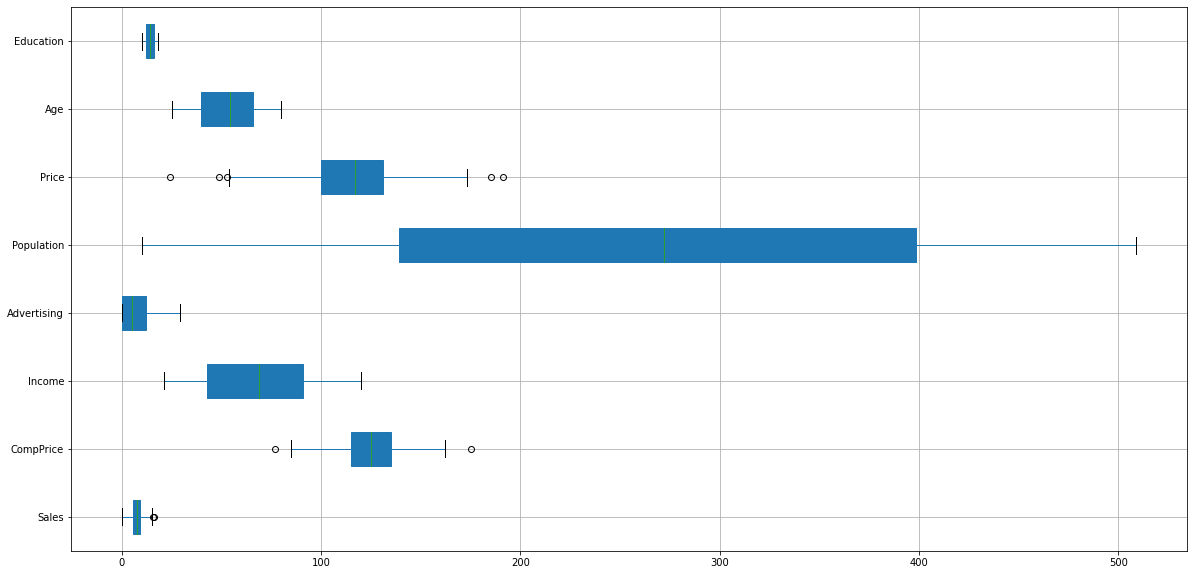

In [5]:
plt.figure(figsize=(20,10))
dataset.boxplot(patch_artist=True,vert=False)

In [6]:
dataset.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
dataset.shape

(400, 11)

In [9]:
list(dataset.columns)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

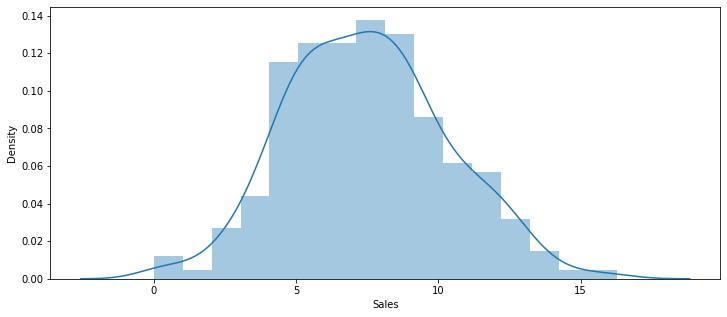

In [10]:
plt.figure(figsize=(12,5))
sns.distplot(dataset['Sales'])

In [11]:
# categorical column
categorical_data = dataset.select_dtypes(include=[object])
categorical_data.head(2)

,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes


In [12]:
print(dataset['ShelveLoc'].unique())
print(dataset['Urban'].unique())
print(dataset['US'].unique())

['Bad' 'Good' 'Medium']
['Yes' 'No']
['Yes' 'No']


# Independent and Dependent Variables

# Splitting the Dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=['Sales']),dataset['Sales'],test_size = 0.25, random_state = 0)

In [14]:
X_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
250,137,105,10,435,156,Good,72,14,Yes,Yes
63,119,88,10,170,101,Medium,61,13,Yes,Yes
312,137,117,5,337,135,Bad,38,10,Yes,Yes
159,119,60,0,372,70,Bad,30,18,No,No
283,135,110,0,112,117,Medium,80,16,No,No
...,...,...,...,...,...,...,...,...,...,...
323,107,105,18,428,103,Medium,34,12,Yes,Yes
192,108,26,0,408,93,Medium,56,14,No,No
117,145,53,0,507,119,Medium,41,12,Yes,No
47,126,98,0,173,108,Bad,55,16,Yes,No


#Encoding Categorical Data

In [15]:
transformer=ColumnTransformer(transformers=[
    ('CAT1',OrdinalEncoder(categories=[["Bad","Medium","Good"]]),["ShelveLoc"]),
    ('CAT2',OneHotEncoder(sparse=False,drop='first'),['Urban','US'])
],remainder='passthrough')


In [16]:
X_train = transformer.fit_transform(X_train)
X_test=transformer.fit_transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# MACHINE LEARNING ALGORITHM

RandomForest
Model1

In [18]:
#Fitting the model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [19]:
rfr.score(X_train,y_train)

0.9586114644248411

In [20]:
rfr.score(X_test,y_test)

0.6783704867246152

Random Forest Model 2 introducing all parametr

In [21]:
#Fitting the model2
from sklearn.ensemble import RandomForestRegressor
rfr1 = RandomForestRegressor(
    n_estimators=100,   # number of trees in the forest
    criterion='friedman_mse',    # function to measure the quality of a split
    max_depth=None,     # maximum depth of each tree
    min_samples_split=2,# minimum number of samples required to split a node
    min_samples_leaf=1, # minimum number of samples required at a leaf node
    min_weight_fraction_leaf=0.0, # minimum weighted fraction of the input samples required at a leaf node
    max_features='auto', # number of features to consider when looking for the best split
    max_leaf_nodes= None , # maximum number of leaf nodes allowed in each tree
    min_impurity_decrease= 0.0,  # threshold for early stopping in tree growth
    bootstrap=True,     # whether to bootstrap samples when building trees
    oob_score=False,    # whether to use out-of-bag samples to estimate the generalization accuracy
    n_jobs=None,        # number of jobs to run in parallel for both fit and predict
    random_state=0,    # seed used by the random number generator
    verbose=0,          # controls the verbosity of the output
    warm_start=False,   # whether to reuse the solution of the previous call to fit
    ccp_alpha=0.0,      # complexity parameter used for Minimal Cost-Complexity Pruning
    max_samples=None    # maximum number of samples to draw from X to train each base estimator
)
rfr1.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(criterion='friedman_mse', max_features='auto',
                      random_state=0)

In [22]:
#Predict my test results
y_pred1 = rfr1.predict(X_test)

In [23]:
rfr1.score(X_train,y_train)

0.9586504482364813

In [24]:
rfr1.score(X_test,y_test)

0.6752673626495082

#Validation
hyperparameter tuning
using gridserach cv

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['friedman_mse','mae'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [26]:
reg = GridSearchCV(rfr,param_grid=param_grid)

In [27]:
reg.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
225 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/utils/_

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [28]:
y_pred2=reg.predict(X_test)

In [29]:
reg.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 8,
 'max_features': 0.5,
 'min_samples_split': 0.25}

In [30]:
rfr2=RandomForestRegressor(criterion='friedman_mse',max_depth=8,max_features=0.5,min_samples_split=0.25)
rfr2.fit(X_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=8, max_features=0.5,
                      min_samples_split=0.25)

In [31]:
rfr2.score(X_train,y_train)

0.5072559089353053

In [32]:
rfr2.score(X_test,y_test)

0.5137159452670206

model 4 using gradient booster for more improvent

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [34]:
gbr.score(X_train,y_train)

0.9634067448568986

In [35]:
gbr.score(X_test,y_test)

0.7080970547958398

model 5 select from model

In [36]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(rfr, prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
rfr_selected = RandomForestRegressor(random_state=0)
rfr_selected.fit(X_train_selected, y_train)

RandomForestRegressor(random_state=0)

In [37]:
rfr_selected.score(X_train_selected,y_train)

0.9205852789077966

In [38]:
rfr_selected.score(X_test_selected,y_test)

0.48308896395623147

model 6 using voting regressor

In [39]:
from sklearn.ensemble import VotingRegressor
rfr3 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
rfr4 = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=0)
rfr5 = RandomForestRegressor(n_estimators=50, max_depth=20, random_state=0)


In [40]:
# create a Voting Regressor that combines the three Random Forest regressors
vr = VotingRegressor(estimators=[('rfr3', rfr3), ('rfr4', rfr4), ('rfr5', rfr5)])
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('rfr3',
                             RandomForestRegressor(max_depth=5,
                                                   random_state=0)),
                            ('rfr4',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=200,
                                                   random_state=0)),
                            ('rfr5',
                             RandomForestRegressor(max_depth=20,
                                                   n_estimators=50,
                                                   random_state=0))])

In [41]:
vr.score(X_train,y_train)


0.9252573199680657

In [42]:
vr.score(X_test,y_test)

0.6774958351305572

In [43]:
from prettytable import PrettyTable
scoreTable =PrettyTable(['Model','train_score','test_score'])
scoreTable.add_row(['MOdel1','0.9586','0.6783'])
scoreTable.add_row(['MOdel2','0.9586','0.6752'])
scoreTable.add_row(['validation','0.5143','0.5212'])
scoreTable.add_row(['MOdel4','0.9634','0.7080'])
scoreTable.add_row(['MOdel5','0.9205','0.4830'])
scoreTable.add_row(['MOdel6','0.9252','0.6774'])
print(scoreTable)


+------------+-------------+------------+
|   Model    | train_score | test_score |
+------------+-------------+------------+
|   MOdel1   |    0.9586   |   0.6783   |
|   MOdel2   |    0.9586   |   0.6752   |
| validation |    0.5143   |   0.5212   |
|   MOdel4   |    0.9634   |   0.7080   |
|   MOdel5   |    0.9205   |   0.4830   |
|   MOdel6   |    0.9252   |   0.6774   |
+------------+-------------+------------+


From the result it is clear that model1 ,model2 ,model3, model 4 ,model5 and model6 both showing somewhat same results ,but the gaps between in accuracy in training data and test data is very high which is not acceptable so, its accuracy is not reliable on the other hand tuned or validation result not showing much accuracy but gap between in accuracy are very low and are more reliable and stable. so, we will go with tuned result prediction.  